In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.io import loadmat, savemat
from scipy import signal

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
mt_file = loadmat('data/gestures_4d_full.mat')
print(mt_file.keys())

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])


In [4]:
ser_file = loadmat('data/se_labels_names_manual.mat')
print(ser_file.keys())

labels_se = ser_file['labels']
start_end_array = ser_file['se']

dict_keys(['__header__', '__version__', '__globals__', 'se', 'labels', 'labels_name'])


### alignment and saving

In [5]:
aligned_data_full = []
for start_end, sig in zip(start_end_array, mt_file['data']):
    start_idx = start_end[0]
    new_sig = np.roll(sig, shift=int(20-start_idx), axis=0)
#     new_sig = shift(sig, shift=np.array([20-step_idx,0]), mode='reflect')
    aligned_data_full.append(new_sig)

aligned_data_full = np.array(aligned_data_full) 

aligned_data_full.shape

(7420, 120, 67, 3)

In [6]:
data_check = np.mean(np.linalg.norm(aligned_data_full[::,::,::,::], axis=-1), axis=-1)
scaler = StandardScaler()
data_check = scaler.fit_transform(data_check.T).T

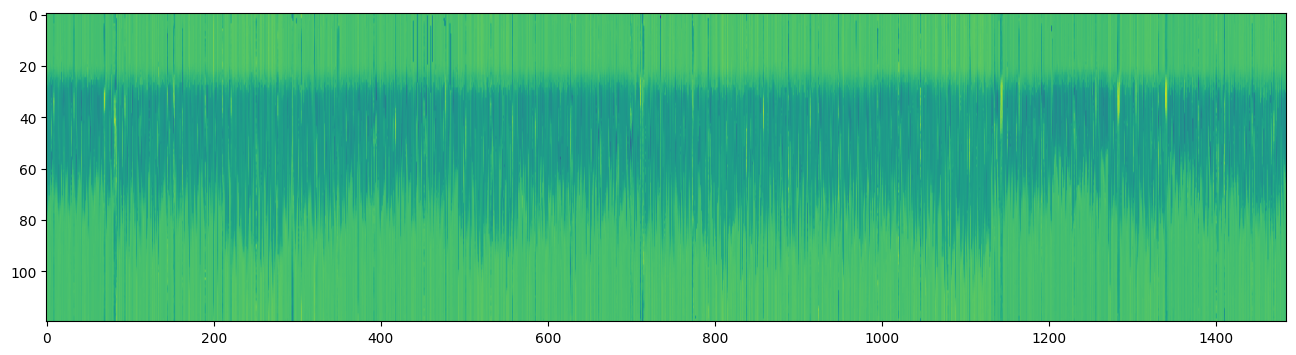

In [7]:
plt.figure(figsize=(16,4))
plt.imshow(data_check[::5,::].T, aspect='auto')
plt.show()

In [8]:
clean_last_step_idx = 20 - start_end_array[::,0] + start_end_array[::,1]
clean_first_step_idx = np.ones_like(clean_last_step_idx)*20

In [10]:
mdic = {"labels": labels_se, "data": aligned_data_full,
        'starts':clean_first_step_idx, 'stops':clean_last_step_idx}

In [12]:
savemat("data/ALIGNED_SER_4d_full.mat", mdic)